In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import  silhouette_score
from sklearn.neighbors import NearestNeighbors
import requests

In [2]:
df = pd.read_csv('uber-raw-data-apr14.csv')
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [3]:
df.tail()

,Date/Time,Lat,Lon,Base
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764
564515,4/30/2014 23:48:00,40.6880,-73.9608,B02764


In [4]:
df.shape

(564516, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


In [6]:
# Transformation en type datetime et création de nouvelles colonnes
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format='%m/%d/%Y %H:%M:%S')
df['Day_of_month'] = df['Date/Time'].dt.day
df['Day_of_week'] = df['Date/Time'].dt.dayofweek
df['Hour'] = df['Date/Time'].dt.hour
df['Day'] = df['Date/Time'].dt.day_name(locale='fr_FR')

In [7]:
df.describe()

,Date/Time,Lat,Lon,Day_of_month,Day_of_week,Hour
count,564516,564516.000000,564516.000000,564516.000000,564516.00000,564516.000000
mean,2014-04-16 17:46:01.296261120,40.740005,-73.976817,16.117127,2.86698,14.465043
min,2014-04-01 00:00:00,40.072900,-74.773300,1.000000,0.00000,0.000000
25%,2014-04-08 16:27:00,40.722500,-73.997700,8.000000,1.00000,10.000000
50%,2014-04-16 19:19:00,40.742500,-73.984800,16.000000,3.00000,16.000000
75%,2014-04-24 22:14:00,40.760700,-73.970000,24.000000,4.00000,19.000000
max,2014-04-30 23:59:00,42.116600,-72.066600,30.000000,6.00000,23.000000
std,NaN,0.036083,0.050426,9.048139,1.82081,5.873925


In [8]:
df.head()

,Date/Time,Lat,Lon,Base,Day_of_month,Day_of_week,Hour,Day
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,1,0,Mardi
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,1,0,Mardi
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,1,0,Mardi
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,1,0,Mardi
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,1,0,Mardi


In [177]:
#px.box(df, 'Lat')
#px.box(df, 'Lon')

In [9]:
# Recherche de valeurs manquantes
df.isna().sum().sum()

np.int64(0)

In [10]:
# recherche de doublons
df.duplicated().sum()

np.int64(7749)

In [11]:
# Visualisation des doublons
df[df.duplicated(keep=False)]

,Date/Time,Lat,Lon,Base,Day_of_month,Day_of_week,Hour,Day
43,2014-04-01 05:44:00,40.7430,-74.0301,B02512,1,1,5,Mardi
44,2014-04-01 05:44:00,40.7430,-74.0301,B02512,1,1,5,Mardi
127,2014-04-01 07:25:00,40.7805,-73.9481,B02512,1,1,7,Mardi
128,2014-04-01 07:25:00,40.7805,-73.9481,B02512,1,1,7,Mardi
184,2014-04-01 08:25:00,40.7620,-73.9787,B02512,1,1,8,Mardi
...,...,...,...,...,...,...,...,...
554510,2014-04-30 23:39:00,40.7558,-73.9823,B02682,30,2,23,Mercredi
554511,2014-04-30 23:39:00,40.7625,-73.9216,B02682,30,2,23,Mercredi
554512,2014-04-30 23:39:00,40.7625,-73.9216,B02682,30,2,23,Mercredi
554517,2014-04-30 23:40:00,40.7095,-74.0113,B02682,30,2,23,Mercredi


In [12]:
df.shape

(564516, 8)

In [13]:
# Suppression des doublons
df = df.drop_duplicates(keep='first')

In [14]:
df.shape

(556767, 8)

In [15]:
# Visualisation des points de données
fig = px.scatter_mapbox(df, lat="Lat", lon="Lon", color="Base", 
                        zoom=6,
                        mapbox_style="carto-positron")
fig.write_html(r"html\carte_apr14.html")

Cette carte montre des outliers.

In [16]:
# Recherche du boundingbox de la ville de NY avec l'api nominatim
# URL de l'API Nominatim
url = "https://nominatim.openstreetmap.org/search"
# En-têtes de la requête
headers = {
    'User-Agent': 'Chrome/130.0'
}
params = {
        "q":"New York City",  
        "format": "json",   
    }
# Requête vers l'API
response = requests.get(url, params=params, headers=headers) 

data = response.json()
boundingbox = data[0]['boundingbox']
boundingbox

['40.4765780', '40.9176300', '-74.2588430', '-73.7002330']

In [17]:
df.shape

(556767, 8)

In [18]:
# Filtrage du df avec les valeurs boundingbox
df = df[
    (df['Lat'].between(40.4765780, 40.9176300)) &
    (df['Lon'].between(-74.2588430, -73.7002330))
]

In [19]:
df.shape

(554398, 8)

In [20]:
# Visualisation des points de données après suppression des outliers
fig = px.scatter_mapbox(df, lat="Lat", lon="Lon", color="Base", 
                        zoom=9,
                        mapbox_style="carto-positron")
fig.write_html(r"html\carte_apr14_drop_outliers.html")

<Axes: xlabel='Base', ylabel='count'>

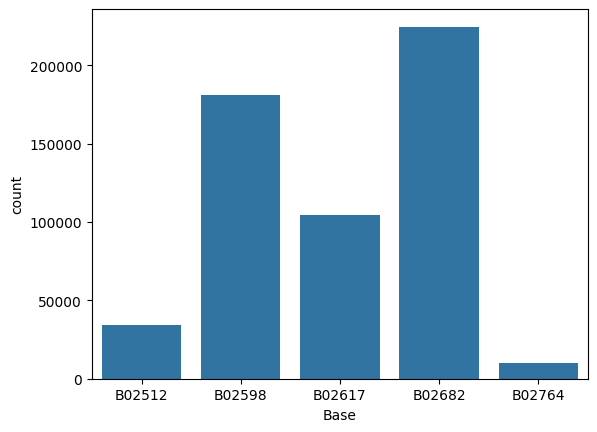

In [21]:
sns.countplot(df, x='Base')

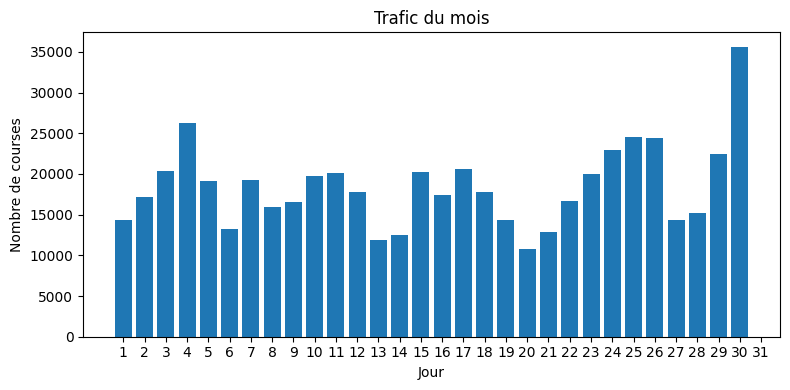

In [22]:
# Traffic du mois
traffic_month = df['Day_of_month'].value_counts().sort_index()

plt.figure(figsize=(8, 4))
plt.bar(traffic_month.index, traffic_month.values)
plt.xlabel('Jour')
plt.ylabel('Nombre de courses')
plt.title('Trafic du mois')
plt.xticks(range(1, 32))  
plt.tight_layout()
plt.show()

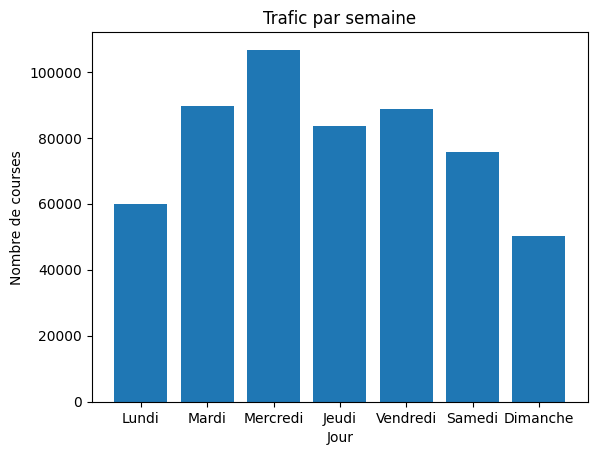

In [24]:
# Ordre des jours
ordre_jours = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']

# Transformation de la colonne 'Day' en catégorie ordonnée
df['Day'] = pd.Categorical(df['Day'], categories=ordre_jours, ordered=True)

# Traffic par semaine
traffic_by_day_of_week = df['Day'].value_counts().sort_index()

plt.figure()
plt.bar(traffic_by_day_of_week.index, traffic_by_day_of_week.values)
plt.xlabel('Jour')
plt.ylabel('Nombre de courses')
plt.title('Trafic par semaine')
plt.show()

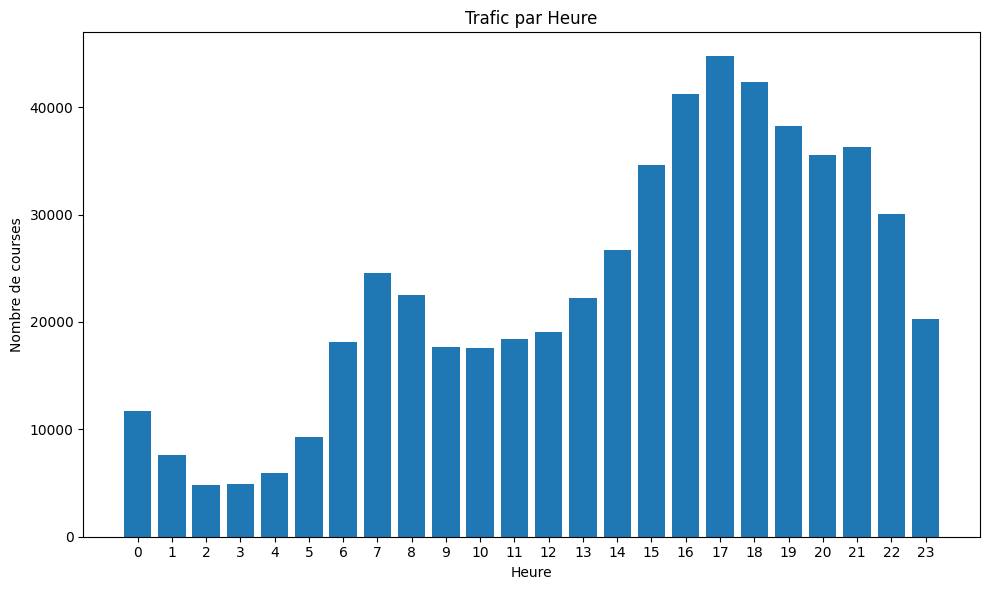

In [25]:
# Traffic par heure
traffic_by_hour = df['Hour'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(traffic_by_hour.index, traffic_by_hour.values)
plt.xlabel('Heure')
plt.ylabel('Nombre de courses')
plt.title('Trafic par Heure')
plt.xticks(range(0,24))  
plt.tight_layout()
plt.show()

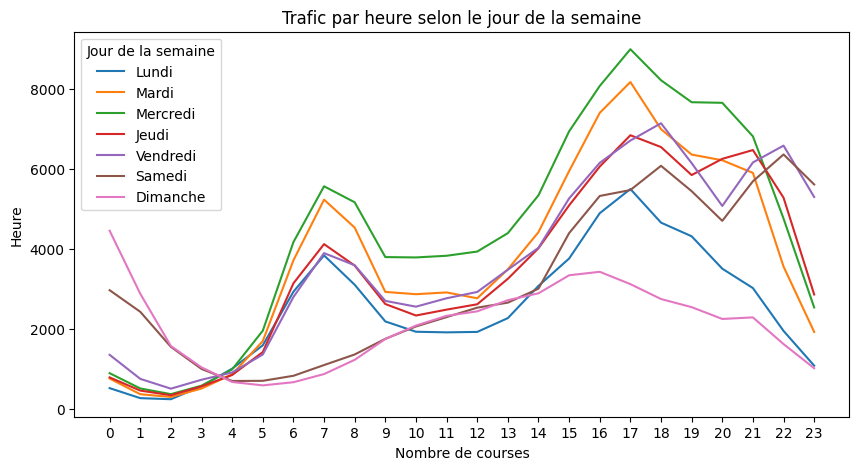

In [26]:
# Traffic par heure en fonction des jours

traffic_by_hour_and_day = df[['Day','Hour']].value_counts().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=traffic_by_hour_and_day, x='Hour', y='count', hue='Day', hue_order=ordre_jours)

plt.ylabel('Heure')
plt.xlabel('Nombre de courses')
plt.title('Trafic par heure selon le jour de la semaine')
plt.xticks(range(0, 24))
plt.legend(title='Jour de la semaine')
plt.show()

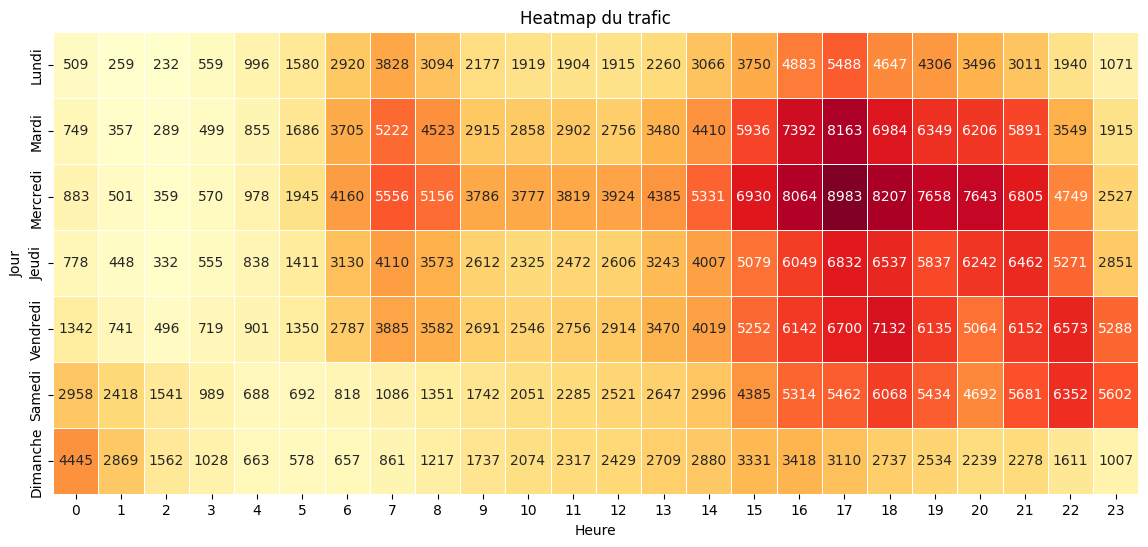

In [27]:
# Heatmap par jour et par heure
# Tableau de type pivot 
pivot = df.pivot_table(index='Day', columns='Hour', values='Base', aggfunc='count',observed=False)

# Création de la heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(pivot, cmap='YlOrRd', linewidths=0.5, annot=True, fmt=".0f", cbar=False)
plt.title("Heatmap du trafic")
plt.xlabel("Heure")
plt.ylabel("Jour")
plt.show()

# Courses du Mercredi à 17h

In [28]:
# Création d'un dataframe
maxi = df[(df['Day']== 'Mercredi') & (df['Hour']==17)].copy()
display(maxi.head())
print(maxi.shape)

,Date/Time,Lat,Lon,Base,Day_of_month,Day_of_week,Hour,Day
1836,2014-04-02 17:00:00,40.7625,-73.9810,B02512,2,2,17,Mercredi
1837,2014-04-02 17:01:00,40.7574,-73.9862,B02512,2,2,17,Mercredi
1838,2014-04-02 17:01:00,40.7605,-73.9821,B02512,2,2,17,Mercredi
1839,2014-04-02 17:01:00,40.7518,-73.9758,B02512,2,2,17,Mercredi
1840,2014-04-02 17:02:00,40.7174,-74.0027,B02512,2,2,17,Mercredi


(8983, 8)


<Axes: xlabel='Base', ylabel='count'>

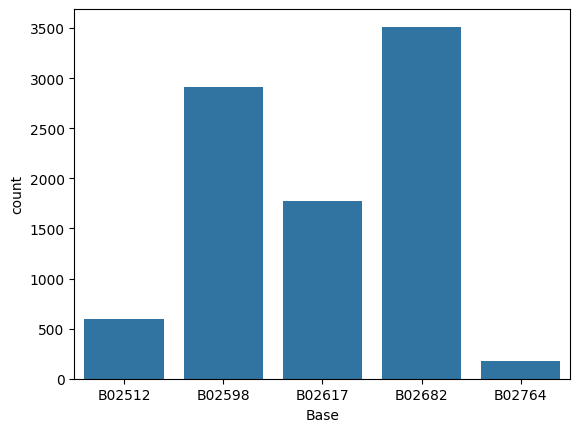

In [29]:
sns.countplot(maxi, x='Base')

In [30]:
# Sélection des features
X = maxi[['Lat', 'Lon']]

# Standardisation
sc = StandardScaler()
X = sc.fit_transform(X) 

### Cluster Kmeans

c:\Users\sophi\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
[WinError 2] Le fichier spécifié est introuvable
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "c:\Users\sophi\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\sophi\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sophi\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\sophi\

[12655.642323142229, 7133.449932957461, 5502.65863875113, 4971.98657012223, 3488.75406030013, 3509.4385918383846, 2417.4315292439405, 2067.9987446894543, 1699.0135751893308]


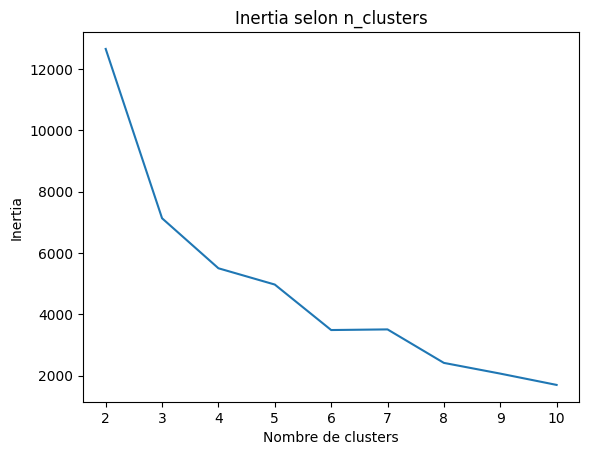

In [31]:
# Utilisation de la méthode Elbow pour trouver le nombre optimal de clusters

wcss =  []
for i in range (2,11): 
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
print(wcss)

# Affichage de scores en fonction du nombre de clusters
plt.plot(range(2,11), wcss)
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertia")
plt.title("Inertia selon n_clusters")
plt.show()

[np.float64(0.46529831986440184), np.float64(0.47643791332245367), np.float64(0.5112935729322184), np.float64(0.38391817967810304), np.float64(0.45632106371051984), np.float64(0.41210850175299873), np.float64(0.43454082157984336), np.float64(0.4396219029913772), np.float64(0.4536466816674217)]


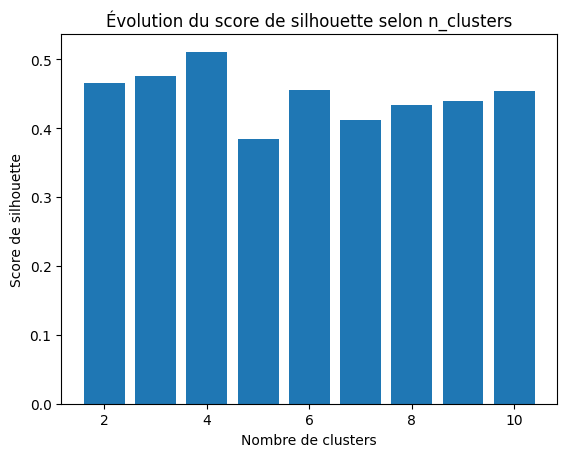

In [32]:
# Utilisation du silhouette_score pour déterminer le nombre optimal de clusters
s_score = []
for i in range (2,11): 
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(X)
    s_score.append(silhouette_score(X, kmeans.predict(X), random_state=42, n_jobs=-1))
print(s_score)

# Affichage de scores en fonction du nombre de clusters
plt.bar(range(2,11), s_score)
plt.xlabel("Nombre de clusters")
plt.ylabel("Score de silhouette")
plt.title("Évolution du score de silhouette selon n_clusters")
plt.show()

In [33]:
# Entrainement de KMeans avec le nombre optimal de clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# Ajout d'une colonne avec les prédictions
maxi['Cluster_KMeans'] = kmeans.predict(X).astype(str)
maxi.head()

,Date/Time,Lat,Lon,Base,Day_of_month,Day_of_week,Hour,Day,Cluster_KMeans
1836,2014-04-02 17:00:00,40.7625,-73.9810,B02512,2,2,17,Mercredi,0
1837,2014-04-02 17:01:00,40.7574,-73.9862,B02512,2,2,17,Mercredi,0
1838,2014-04-02 17:01:00,40.7605,-73.9821,B02512,2,2,17,Mercredi,0
1839,2014-04-02 17:01:00,40.7518,-73.9758,B02512,2,2,17,Mercredi,0
1840,2014-04-02 17:02:00,40.7174,-74.0027,B02512,2,2,17,Mercredi,1


In [34]:
# Visualisation des clusters 
fig = px.scatter_mapbox(maxi, lat="Lat", lon="Lon", 
                        color="Cluster_KMeans", 
                        zoom=9,
                        mapbox_style="carto-positron",
                        title="Visualisation des clusters avec KMeans - Mercredi 17h")
fig.write_html(r"html\clusters_maxi_kmeans.html")

### Cluster Dbscan

In [ ]:
db = DBSCAN(eps=0.25, min_samples=5, metric='euclidean')

# Ajout d'une colonne avec les prédictions
maxi['Cluster_Dbscan']=db.fit_predict(X).astype('str')
display(maxi.head())

# Visualisation des clusters 
fig = px.scatter_mapbox(maxi[maxi['Cluster_Dbscan']!='-1'], lat="Lat", lon="Lon", 
                        color="Cluster_Dbscan", 
                        zoom=9.5,
                        mapbox_style="carto-positron",
                        title="Visualisation des clusters avec DBSCAN - Mercredi 17h")
fig.write_html(r"html\clusters_maxi_dbscan.html")

,Date/Time,Lat,Lon,Base,Day_of_month,Day_of_week,Hour,Day,Cluster_KMeans,Cluster_Dbscan
1836,2014-04-02 17:00:00,40.7625,-73.9810,B02512,2,2,17,Mercredi,0,0
1837,2014-04-02 17:01:00,40.7574,-73.9862,B02512,2,2,17,Mercredi,0,0
1838,2014-04-02 17:01:00,40.7605,-73.9821,B02512,2,2,17,Mercredi,0,0
1839,2014-04-02 17:01:00,40.7518,-73.9758,B02512,2,2,17,Mercredi,0,0
1840,2014-04-02 17:02:00,40.7174,-74.0027,B02512,2,2,17,Mercredi,1,0


# Courses du Lundi à 2h

In [36]:
# Création d'un dataframe
mini = df[(df['Day']== 'Lundi') & (df['Hour']==2)].copy()
display(mini.head())
print(mini.shape)

,Date/Time,Lat,Lon,Base,Day_of_month,Day_of_week,Hour,Day
7790,2014-04-07 02:07:00,40.7458,-73.8273,B02512,7,0,2,Lundi
7791,2014-04-07 02:36:00,40.7415,-74.0086,B02512,7,0,2,Lundi
7792,2014-04-07 02:42:00,40.7278,-73.9851,B02512,7,0,2,Lundi
15866,2014-04-14 02:44:00,40.7632,-73.9719,B02512,14,0,2,Lundi
15867,2014-04-14 02:53:00,40.7215,-73.9884,B02512,14,0,2,Lundi


(232, 8)


In [37]:
# Sélection des features
X = mini[['Lat', 'Lon']]

# Standardisation
sc = StandardScaler()
X = sc.fit_transform(X) 

### K means

[329.466935622081, 231.91453282387656, 184.6111222030022, 122.01091446534517, 90.32451605822077, 72.90818941343323, 63.57550303720515, 59.32280622683419, 40.97288148221315]


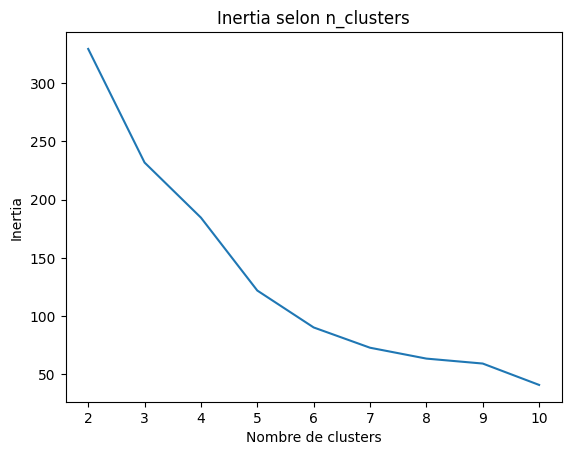

In [38]:
# Utilisation de la méthode Elbow pour trouver le nombre optimal de clusters

wcss =  []
for i in range (2,11): 
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
print(wcss)

# Affichage de scores en fonction du nombre de clusters
plt.plot(range(2,11), wcss)
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertia")
plt.title("Inertia selon n_clusters")
plt.show()

[np.float64(0.3460072979622992), np.float64(0.5089586728229857), np.float64(0.4714218719137709), np.float64(0.42235357421902237), np.float64(0.4449650939235756), np.float64(0.41593435731725814), np.float64(0.4992171825368947), np.float64(0.4194486648090271), np.float64(0.4164438971335972)]


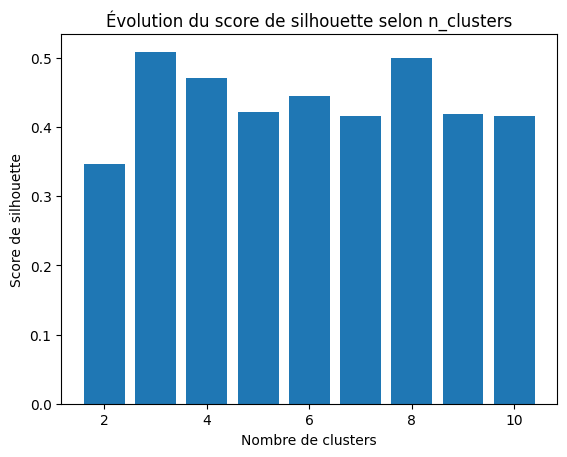

In [39]:
# Utilisation du silhouette_score pour déterminer le nombre optimal de clusters
s_score = []
for i in range (2,11): 
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(X)
    s_score.append(silhouette_score(X, kmeans.predict(X), random_state=42, n_jobs=-1))
print(s_score)

# Affichage de scores en fonction du nombre de clusters
plt.bar(range(2,11), s_score)
plt.xlabel("Nombre de clusters")
plt.ylabel("Score de silhouette")
plt.title("Évolution du score de silhouette selon n_clusters")
plt.show()

In [40]:
# Entrainement de KMeans avec le nombre optimal de clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Ajout d'une colonne avec les prédictions
mini['Cluster_KMeans'] = kmeans.predict(X).astype('str')
display(mini.head())

# Visualisation des clusters 
fig = px.scatter_mapbox(mini, lat="Lat", lon="Lon", 
                        color="Cluster_KMeans", 
                        zoom=9,
                        mapbox_style="carto-positron",
                        title="Visualisation des clusters avec KMeans - Lundi 2h")
fig.write_html(r"html\clusters_mini_kmeans.html")

,Date/Time,Lat,Lon,Base,Day_of_month,Day_of_week,Hour,Day,Cluster_KMeans
7790,2014-04-07 02:07:00,40.7458,-73.8273,B02512,7,0,2,Lundi,2
7791,2014-04-07 02:36:00,40.7415,-74.0086,B02512,7,0,2,Lundi,1
7792,2014-04-07 02:42:00,40.7278,-73.9851,B02512,7,0,2,Lundi,1
15866,2014-04-14 02:44:00,40.7632,-73.9719,B02512,14,0,2,Lundi,2
15867,2014-04-14 02:53:00,40.7215,-73.9884,B02512,14,0,2,Lundi,1


### Dbscan

In [ ]:
db = DBSCAN(eps=0.59, min_samples=4, metric='euclidean')

# Ajout d'une colonne avec les prédictions
mini['Cluster_Dbscan']=db.fit_predict(X).astype('str')
display(mini.head())

# Visualisation des clusters 
fig = px.scatter_mapbox(mini[mini['Cluster_Dbscan']!='-1'], lat="Lat", lon="Lon", 
                        color="Cluster_Dbscan", 
                        zoom=9,
                        mapbox_style="carto-positron",
                        title="Visualisation des clusters avec DBSCAN - Lundi 2h")
fig.write_html(r"html\clusters_mini_dbscan.html")

,Date/Time,Lat,Lon,Base,Day_of_month,Day_of_week,Hour,Day,Cluster_KMeans,Cluster_Dbscan
7790,2014-04-07 02:07:00,40.7458,-73.8273,B02512,7,0,2,Lundi,2,-1
7791,2014-04-07 02:36:00,40.7415,-74.0086,B02512,7,0,2,Lundi,1,0
7792,2014-04-07 02:42:00,40.7278,-73.9851,B02512,7,0,2,Lundi,1,0
15866,2014-04-14 02:44:00,40.7632,-73.9719,B02512,14,0,2,Lundi,2,0
15867,2014-04-14 02:53:00,40.7215,-73.9884,B02512,14,0,2,Lundi,1,0


# Courses du mois d'Avril

In [45]:
# Sélection des features
X = df[['Lat', 'Lon']]

# Standardisation
sc = StandardScaler()
X = sc.fit_transform(X) 

### KMeans

[752635.7653830932, 462164.7175459959, 387606.9230293268, 296684.8781285015, 206053.86901279268, 174176.11848099722, 146652.00362924815, 127890.65219506189, 106957.63934406659]


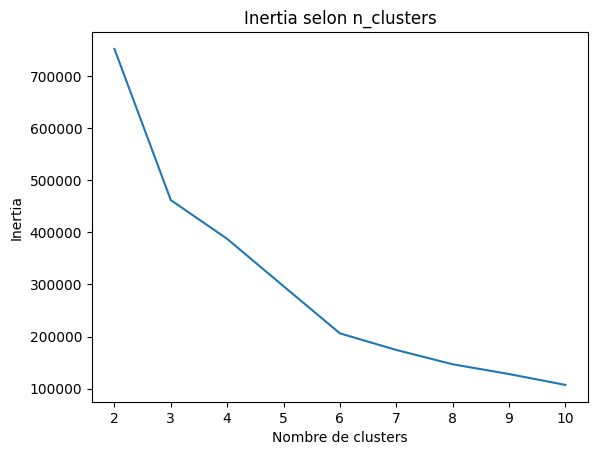

In [46]:
# Utilisation de la méthode Elbow pour trouver le nombre optimal de clusters

wcss =  []
for i in range (2,11): 
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
print(wcss)

# Affichage de scores en fonction du nombre de clusters
plt.plot(range(2,11), wcss)
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertia")
plt.title("Inertia selon n_clusters")
plt.show()

[np.float64(0.380541241115124), np.float64(0.43068107122471083), np.float64(0.44609707018547934), np.float64(0.46282495937512896), np.float64(0.4803330300993535), np.float64(0.4378178081922996), np.float64(0.45070974424682936), np.float64(0.41664387712311773), np.float64(0.4116469089576349)]


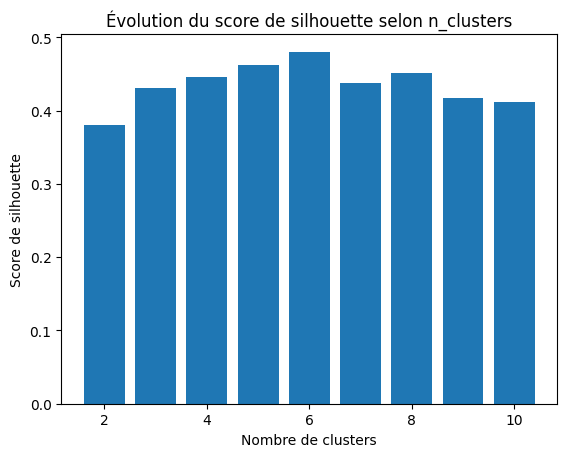

In [47]:
# Utilisation du silhouette_score pour déterminer le nombre optimal de clusters
s_score = []
for i in range (2,11): 
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(X)
    s_score.append(silhouette_score(X, kmeans.predict(X), sample_size=10000, random_state=42, n_jobs=-1))
print(s_score)

# Affichage de scores en fonction du nombre de clusters
plt.bar(range(2,11), s_score)
plt.xlabel("Nombre de clusters")
plt.ylabel("Score de silhouette")
plt.title("Évolution du score de silhouette selon n_clusters")
plt.show()

In [48]:
# Entrainement de KMeans avec le nombre optimal de clusters
kmeans = KMeans(n_clusters=7)
kmeans.fit(X)

# Ajout d'une colonne avec les prédictions
df['Cluster_KMeans'] = kmeans.predict(X).astype('str')

# Visualisation des clusters 
fig = px.scatter_mapbox(df, lat="Lat", lon="Lon", 
                        color="Cluster_KMeans", 
                        zoom=9,
                        mapbox_style="carto-positron",
                        title="Visualisation des clusters avec KMeans")
fig.write_html(r"html\avril_kmeans.html")

In [49]:
# Ajout d'une colonne Day_Hour
df['Day_Hour'] = df['Day'].astype(str) + ' ' + df['Hour'].astype(str) + 'h'
df.head()

# Carte animée
fig = px.scatter_mapbox(df, lat="Lat", lon="Lon", 
                        color="Cluster_KMeans", 
                        animation_frame='Day_Hour',
                        zoom=9,
                        mapbox_style="carto-positron",
                        title="Evolution des clusters avec KMeans")
fig.write_html(r"html\clusters_kmeans.html")

### Dbscan

In [51]:
# création d'un échantillon de données
df_sample = df.sample(n=100000, random_state=42)
df.head()

,Date/Time,Lat,Lon,Base,Day_of_month,Day_of_week,Hour,Day,Cluster_KMeans,Day_Hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,1,0,Mardi,6,Mardi 0h
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,1,0,Mardi,0,Mardi 0h
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,1,0,Mardi,0,Mardi 0h
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,1,0,Mardi,1,Mardi 0h
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,1,0,Mardi,1,Mardi 0h


In [52]:
# Sélection des features
X = df_sample[['Lat', 'Lon']]

# Standardisation
sc = StandardScaler()
X = sc.fit_transform(X) 

In [53]:
db = DBSCAN(eps=0.08, min_samples=7, metric='euclidean', n_jobs=-1)

# Ajout d'une colonne avec les prédictions
df_sample['Cluster_Dbscan'] = db.fit_predict(X).astype('str')

# Visualisation des clusters 
fig = px.scatter_mapbox(df_sample[df_sample['Cluster_Dbscan']!='-1'], lat="Lat", lon="Lon", 
                        color="Cluster_Dbscan", 
                        zoom=9,
                        mapbox_style="carto-positron",
                        title="Visualisation des clusters avec DBSCAN")
fig.write_html(r"html\avril_dbscan.html")

In [54]:
# Carte animée
fig = px.scatter_mapbox(df_sample[df_sample['Cluster_Dbscan']!='-1'], lat="Lat", lon="Lon", 
                        color="Cluster_Dbscan", 
                        animation_frame='Day_Hour',
                        zoom=9,
                        mapbox_style="carto-positron",
                        title="Evolution des clusters avec DBSCAN")
fig.write_html(r"html\clusters_dbscan.html")